In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# set the random seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data by scaling the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


4422102/4422102 [==============================] - 0s 0us/step


This code loads the Fashion MNIST dataset, which consists of 60,000 grayscale images of 10 different clothing categories for training, and 10,000 images for testing.

Next, it preprocesses the data by scaling the pixel values of the images to be between 0 and 1, by dividing each pixel value by 255.0, which is the maximum pixel value.

Then, the labels of the data are converted from integer form (0 to 9) to one-hot encoded vectors, which means that each label is represented as a vector of length 10, with all elements being 0 except for the element corresponding to the label, which is 1. This is done using the to_categorical function from keras.utils.

The resulting training data x_train is a 3D array of shape (60000, 28, 28), where each element is an image of size 28x28 pixels. The labels y_train is a 2D array of shape (60000, 10), where each row is a one-hot encoded vector representing the label of the corresponding image in x_train.

Similarly, the testing data x_test is a 3D array of shape (10000, 28, 28), and y_test is a 2D array of shape (10000, 10).

Before we can feed this data into a neural network, we need to convert it into a 1-dimensional array, which can be accomplished using the Flatten layer. The Flatten layer takes the multidimensional input data and reshapes it into a 1-dimensional array without changing the order of the elements. This 1-dimensional array can then be fed into a neural network, which typically consists of fully connected layers that process the input data and produce the final output.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
]) 


This code defines a neural network model using the Keras Sequential API.

The model architecture consists of four layers:

Flatten layer: This layer flattens the input 2D array of the image pixels into a 1D array of size 28*28=784.

Dense layer: This is a fully connected layer with 128 units, which applies a linear transformation to the input and then applies the Rectified Linear Unit (ReLU) activation function to the output.

Dropout layer: This is a regularization technique that randomly drops out (sets to zero) a fraction of the input units during training, which helps to prevent overfitting. The dropout rate used here is 0.2, which means that 20% of the input units will be randomly dropped out during each training iteration.

Dense layer: This is another fully connected layer with 256 units and ReLU activation.

Dropout layer: Another dropout layer with the same rate of 0.2 is added to prevent overfitting.

Dense layer: This is the output layer with 10 units and softmax activation function, which outputs a probability distribution over the 10 possible classes of clothing items in the Fashion MNIST dataset.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trai

In [ ]:
# Compile the model with the optimizer, loss function, and evaluation metric
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Define a callback to save the model with the highest validation accuracy
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint_callback],
)

# Load the saved model with the highest validation accuracy
best_model = keras.models.load_model("best_model.h5")



Epoch 1/20
469/469 [==============================] - 7s 11ms/step - loss: 0.5900 - accuracy: 0.7901 - val_loss: 0.4280 - val_accuracy: 0.8454
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4146 - accuracy: 0.8486 - val_loss: 0.3875 - val_accuracy: 0.8596
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3772 - accuracy: 0.8631 - val_loss: 0.3800 - val_accuracy: 0.8592
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3540 - accuracy: 0.8705 - val_loss: 0.3735 - val_accuracy: 0.8643
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3362 - accuracy: 0.8764 - val_loss: 0.3459 - val_accuracy: 0.8732
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3211 - accuracy: 0.8820 - val_loss: 0.3450 - val_accuracy: 0.8732
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3136 - accuracy: 0.8824 - val_loss: 0.3293 - val_accuracy: 0.8805
Epoc

This code compiles the defined neural network model with an optimizer, loss function, and evaluation metric, using the compile() method of the Keras Sequential API.

The optimizer used here is the Adam optimizer, which is a popular optimization algorithm for deep learning models. The loss function used is categorical cross-entropy, which is a common loss function for multi-class classification problems. The evaluation metric used is accuracy, which measures the fraction of correctly classified samples.

Next, a callback function ModelCheckpoint is defined, which is used to save the model with the highest validation accuracy during training. The monitor parameter specifies the metric to monitor, which is validation accuracy in this case. The save_best_only parameter ensures that only the best model (based on the monitored metric) is saved.

The model is then trained on the training data x_train and y_train using the fit() method of the model. The batch_size parameter specifies the number of samples per gradient update, and the epochs parameter specifies the number of times to iterate over the entire training dataset. The validation_data parameter is used to evaluate the model on the test data x_test and y_test after each epoch. The callbacks parameter is used to pass in the previously defined ModelCheckpoint callback function.

Finally, the saved model with the highest validation accuracy is loaded using the load_model() function of Keras models API, and stored in the variable best_model. This saved model can be used for making predictions on new data or further training the model.

In [ ]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8890
Test loss: 0.3179
Test accuracy: 0.8890


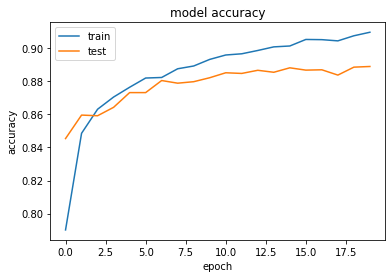

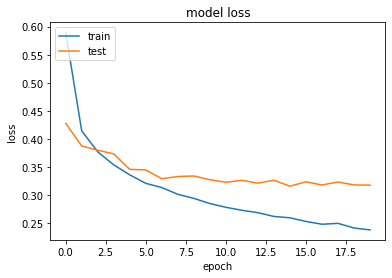

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##Augment the MNIST dataset with rotated, zoomed, width and height shifts

In [ ]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


This code uses the Keras ImageDataGenerator to augment the training and test data. Image augmentation is a technique used to increase the size of the training dataset by generating new images from the existing ones. This can help prevent overfitting and improve the performance of the model.

The train_gen object is defined as an instance of ImageDataGenerator, with various augmentation parameters specified such as rotation_range, width_shift_range, shear_range, height_shift_range, and zoom_range.

The flow method of the ImageDataGenerator object is then called on the original x_train and y_train data to generate augmented images for the training data, and on the original x_test and y_test data to generate augmented images for the test data. The batch_size parameter is set to the shape of the input data to ensure that the entire dataset is generated at once.

The augmented images generated by the ImageDataGenerator are output as a flow, which can be used to extract the augmented images using a loop. The loop first reshapes the original data to match the shape of the generated data, and then concatenates the generated data to the original data.

In the first loop, the augmented images generated from the training data are added to the original training data x_train and y_train. In the second loop, the augmented images generated from the test data are added to the original test data x_test and y_test. The loop is set to break after adding two batches of augmented images, but this can be adjusted as needed.

Overall, this code generates new augmented images for the training and test data using the ImageDataGenerator, and adds them to the original data to create a larger and more diverse dataset for training and testing the neural network model.

##Create, compile and fit the model with the augmented MNIST data

In [ ]:
from keras.layers import Dropout

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
  
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model with the optimizer, loss function, and evaluation metric
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model with dropout
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test))

Epoch 1/30
5625/5625 [==============================] - 58s 10ms/step - loss: 0.5712 - accuracy: 0.7854 - val_loss: 0.3850 - val_accuracy: 0.8598
Epoch 2/30
5625/5625 [==============================] - 57s 10ms/step - loss: 0.4684 - accuracy: 0.8237 - val_loss: 0.3673 - val_accuracy: 0.8659
Epoch 3/30
5625/5625 [==============================] - 58s 10ms/step - loss: 0.4369 - accuracy: 0.8359 - val_loss: 0.3789 - val_accuracy: 0.8598
Epoch 4/30
5625/5625 [==============================] - 57s 10ms/step - loss: 0.4174 - accuracy: 0.8431 - val_loss: 0.3433 - val_accuracy: 0.8735
Epoch 5/30
5625/5625 [==============================] - 58s 10ms/step - loss: 0.4028 - accuracy: 0.8487 - val_loss: 0.3398 - val_accuracy: 0.8798
Epoch 6/30
5625/5625 [==============================] - 57s 10ms/step - loss: 0.3924 - accuracy: 0.8537 - val_loss: 0.3375 - val_accuracy: 0.8806
Epoch 7/30
5625/5625 [==============================] - 59s 10ms/step - loss: 0.3823 - accuracy: 0.8570 - val_loss: 0.3399 -

This code defines a neural network model with 3 layers using the Keras Sequential API. The input layer is a Flatten layer that flattens the 2D input images to a 1D vector. The first hidden layer is a Dense layer with 784 units and ReLU activation function. A Dropout layer with a rate of 0.2 is added after the first hidden layer to prevent overfitting. The output layer is a Dense layer with 10 units and a softmax activation function that outputs the probability distribution over the 10 classes of the Fashion MNIST dataset.

The model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric for evaluation. The model is then trained for 100 epochs on the training data (x_train and y_train) with the validation data (x_test and y_test) used for evaluation during training. The training history is stored in the history variable.

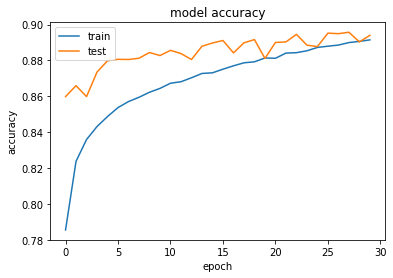

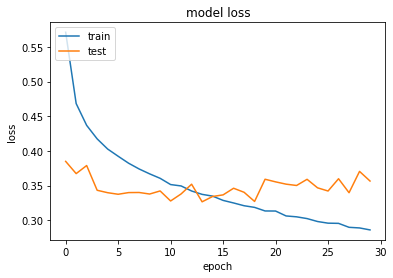

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()